In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [ ]:
# Loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('/content/Parkinsson disease.csv')

In [ ]:
# Splitting features and target variable
X = parkinsons_data.drop(columns=['name', 'status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
# Splitting the data using stratified sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

In [ ]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:
# Reshaping data for 1D CNN
X_train_smote_1d = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_1d = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# One-hot encoding the labels
Y_train_smote_categorical = to_categorical(Y_train_smote)
Y_test_categorical = to_categorical(Y_test)

In [ ]:
# Defining the 1D CNN model
model_1d = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_smote.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model_1d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the 1D CNN model
history_1d = model_1d.fit(X_train_smote_1d, Y_train_smote_categorical, epochs=50, batch_size=32, validation_data=(X_test_1d, Y_test_categorical))

Epoch 1/50
8/8 [==============================] - 1s 35ms/step - loss: 0.5615 - accuracy: 0.7119 - val_loss: 0.5027 - val_accuracy: 0.6667
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4150 - accuracy: 0.7924 - val_loss: 0.5346 - val_accuracy: 0.6667
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3659 - accuracy: 0.8136 - val_loss: 0.4872 - val_accuracy: 0.7436
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3372 - accuracy: 0.8390 - val_loss: 0.4539 - val_accuracy: 0.7436
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3066 - accuracy: 0.8686 - val_loss: 0.3993 - val_accuracy: 0.7436
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2904 - accuracy: 0.8856 - val_loss: 0.3658 - val_accuracy: 0.7949
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2672 - accuracy: 0.8941 - val_loss: 0.3714 - val_accuracy: 0.7692
Epoch 8/50
8/8 [================

In [ ]:
# Evaluating the 1D CNN model
Y_pred_1d = model_1d.predict(X_test_1d)
Y_pred_1d_classes = np.argmax(Y_pred_1d, axis=1)

# Measuring performance metrics
accuracy_1d = accuracy_score(Y_test, Y_pred_1d_classes)
precision_1d = precision_score(Y_test, Y_pred_1d_classes)
recall_1d = recall_score(Y_test, Y_pred_1d_classes)
f1_1d = f1_score(Y_test, Y_pred_1d_classes)

# Printing performance metrics
print(f"1D CNN - Accuracy: {accuracy_1d:.4f}, Precision: {precision_1d:.4f}, Recall: {recall_1d:.4f}, F1 Score: {f1_1d:.4f}")

2/2 [==============================] - 0s 6ms/step
1D CNN - Accuracy: 0.9231, Precision: 0.9333, Recall: 0.9655, F1 Score: 0.9492


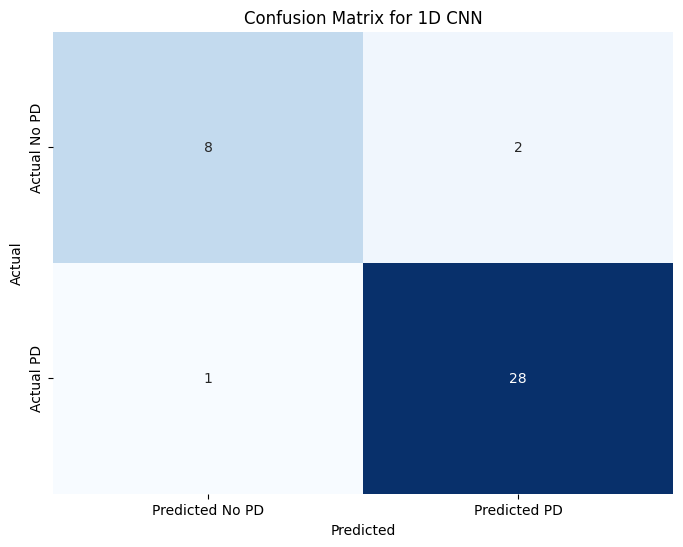

In [ ]:
# Confusion matrix for 1D CNN
cm_1d = confusion_matrix(Y_test, Y_pred_1d_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1d, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted No PD', 'Predicted PD'],
            yticklabels=['Actual No PD', 'Actual PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for 1D CNN')
plt.show()

In [ ]:
# Reshaping data for 2D CNN (reshaping to 22x1 "image" for example)
X_train_smote_2d = X_train_smote.reshape(X_train_smote.shape[0], 22, 1, 1)
X_test_2d = X_test.reshape(X_test.shape[0], 22, 1, 1)

In [ ]:
# Defining the 2D CNN model
model_2d = Sequential([
    Conv2D(32, (2, 1), activation='relu', input_shape=(22, 1, 1)),
    MaxPooling2D((2, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the 2D CNN model
history_2d = model_2d.fit(X_train_smote_2d, Y_train_smote_categorical, epochs=50, batch_size=32, validation_data=(X_test_2d, Y_test_categorical))

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 0.6134 - accuracy: 0.6186 - val_loss: 0.5128 - val_accuracy: 0.6923
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4531 - accuracy: 0.8093 - val_loss: 0.4964 - val_accuracy: 0.6667
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8263 - val_loss: 0.4790 - val_accuracy: 0.6923
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3828 - accuracy: 0.8517 - val_loss: 0.4422 - val_accuracy: 0.7436
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3509 - accuracy: 0.8432 - val_loss: 0.4379 - val_accuracy: 0.7436
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8686 - val_loss: 0.4386 - val_accuracy: 0.7436
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.8602 - val_loss: 0.4055 - val_accuracy: 0.7436
Epoch 8/50
8/8 [=================

In [ ]:
# Evaluating the 2D CNN model
Y_pred_2d = model_2d.predict(X_test_2d)
Y_pred_2d_classes = np.argmax(Y_pred_2d, axis=1)

# Measuring performance metrics
accuracy_2d = accuracy_score(Y_test, Y_pred_2d_classes)
precision_2d = precision_score(Y_test, Y_pred_2d_classes)
recall_2d = recall_score(Y_test, Y_pred_2d_classes)
f1_2d = f1_score(Y_test, Y_pred_2d_classes)

# Printing performance metrics
print(f"2D CNN - Accuracy: {accuracy_2d:.4f}, Precision: {precision_2d:.4f}, Recall: {recall_2d:.4f}, F1 Score: {f1_2d:.4f}")

2/2 [==============================] - 0s 5ms/step
2D CNN - Accuracy: 0.9487, Precision: 0.9355, Recall: 1.0000, F1 Score: 0.9667


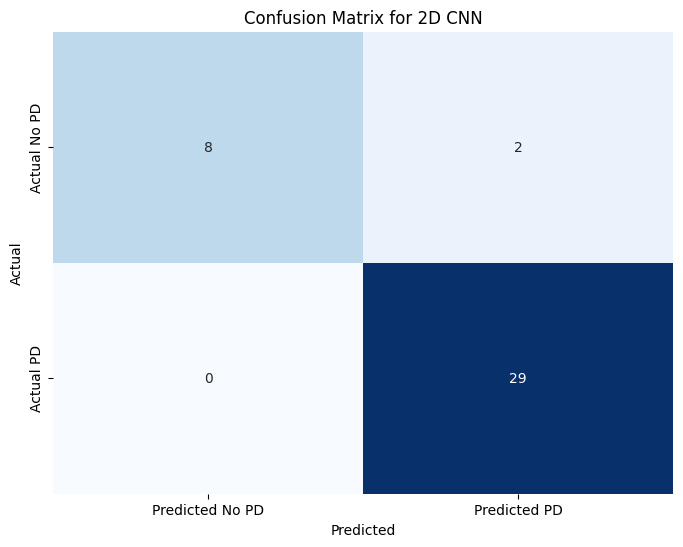

In [ ]:
# Confusion matrix for 2D CNN
cm_2d = confusion_matrix(Y_test, Y_pred_2d_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2d, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted No PD', 'Predicted PD'],
            yticklabels=['Actual No PD', 'Actual PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for 2D CNN')
plt.show()

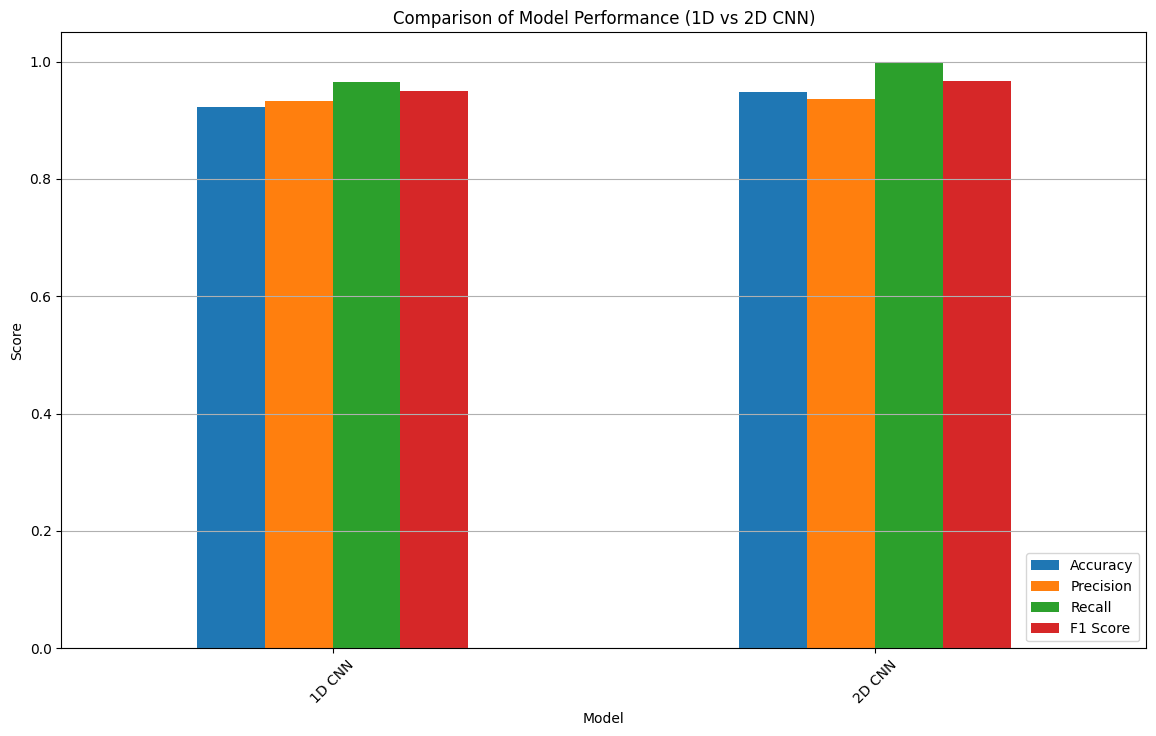

In [ ]:
# Initialize the metrics dictionary
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Adding CNN metrics to the metrics dictionary for both models
metrics["Model"].extend(["1D CNN", "2D CNN"])
metrics["Accuracy"].extend([accuracy_1d, accuracy_2d])
metrics["Precision"].extend([precision_1d, precision_2d])
metrics["Recall"].extend([recall_1d, recall_2d])
metrics["F1 Score"].extend([f1_1d, f1_2d])

# Creating a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plotting the performance comparison for both models
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Model Performance (1D vs 2D CNN)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

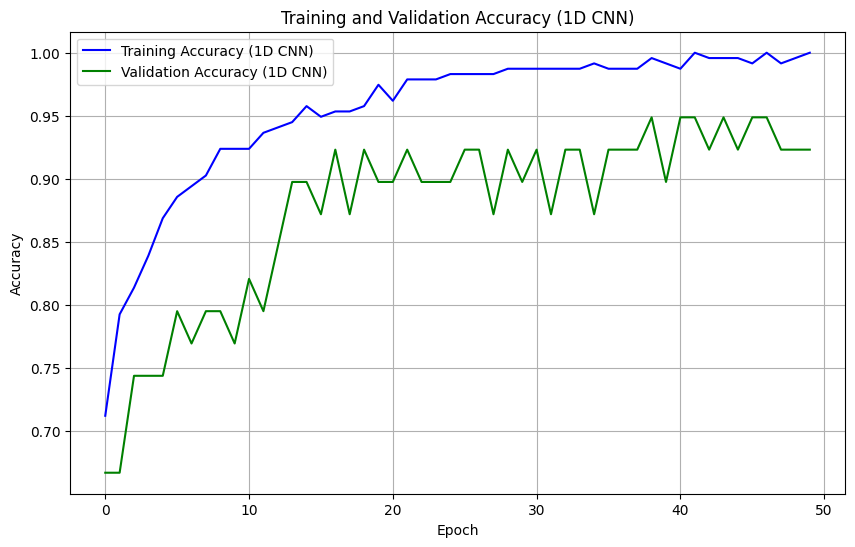

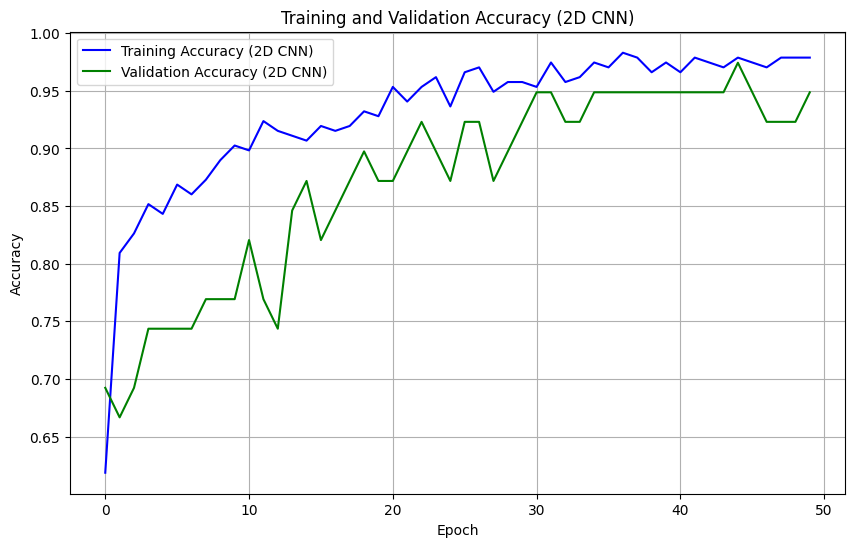

In [ ]:
# Plotting training and validation accuracy curves for 1D CNN
plt.figure(figsize=(10, 6))
plt.plot(history_1d.history['accuracy'], label='Training Accuracy (1D CNN)', color='blue')
plt.plot(history_1d.history['val_accuracy'], label='Validation Accuracy (1D CNN)', color='green')
plt.title('Training and Validation Accuracy (1D CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy curves for 2D CNN
plt.figure(figsize=(10, 6))
plt.plot(history_2d.history['accuracy'], label='Training Accuracy (2D CNN)', color='blue')
plt.plot(history_2d.history['val_accuracy'], label='Validation Accuracy (2D CNN)', color='green')
plt.title('Training and Validation Accuracy (2D CNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sample prediction using 1D CNN model
sample_index = 0  # Change this index as needed
sample_data_1d = X_test_1d[sample_index].reshape(1, -1, 1)
prediction_1d = model_1d.predict(sample_data_1d)
predicted_class_1d = np.argmax(prediction_1d)
print("Sample Prediction using 1D CNN:")
print(f"Predicted Class: {predicted_class_1d}")
print(f"Actual Class: {Y_test.iloc[sample_index]}")

# Sample prediction using 2D CNN model
sample_data_2d = X_test_2d[sample_index].reshape(1, 22, 1, 1)
prediction_2d = model_2d.predict(sample_data_2d)
predicted_class_2d = np.argmax(prediction_2d)
print("\nSample Prediction using 2D CNN:")
print(f"Predicted Class: {predicted_class_2d}")
print(f"Actual Class: {Y_test.iloc[sample_index]}")

1/1 [==============================] - 0s 34ms/step
Sample Prediction using 1D CNN:
Predicted Class: 1
Actual Class: 1
1/1 [==============================] - 0s 33ms/step

Sample Prediction using 2D CNN:
Predicted Class: 1
Actual Class: 1


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=8d719e99895199833fcc33d224a587945fbe1d6a2c46bf23496dbf4ab9c6e272
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import lime
import lime.lime_tabular
import shap

**Using LIME**

In [ ]:
import lime
from lime import lime_tabular, lime_image

# For 1D CNN

# Define the prediction function for 1D CNN
def predict_fn_1d(X):
    # Reshape input data to match the model's input shape
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
    return model_1d.predict(X_reshaped)

# Create LimeTabularExplainer instance for 1D CNN
explainer_1d = lime_tabular.LimeTabularExplainer(X_train_smote, mode="classification")

# Generate local explanations for 1D CNN
explanation_1d = explainer_1d.explain_instance(X_test[0], predict_fn_1d, num_features=X_train_smote.shape[1])

# Display the explanation for 1D CNN
explanation_1d.show_in_notebook()

# For 2D CNN

# Define the prediction function for 2D CNN
def predict_fn_2d(images):
    # Reshape images for prediction
    images_reshaped = images.reshape(-1, 22, 1, 1)
    # Predict using the 2D CNN model
    return model_2d.predict(images_reshaped)

# Reshape the input data for LimeImageExplainer
X_train_smote_2d_tabular = X_train_smote_2d.reshape(X_train_smote_2d.shape[0], -1)

# Create LimeTabularExplainer instance for 2D CNN
explainer_2d = lime_tabular.LimeTabularExplainer(X_train_smote_2d_tabular, mode="classification")

# Generate local explanations for 2D CNN
explanation_2d = explainer_2d.explain_instance(X_test[0], predict_fn_2d, num_features=X_train_smote_2d_tabular.shape[1])

# Display the explanation for 2D CNN
explanation_2d.show_in_notebook()

157/157 [==============================] - 1s 4ms/step


157/157 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


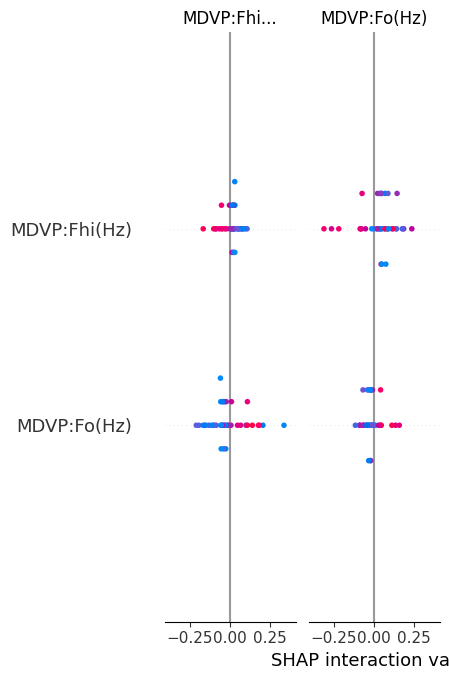

In [ ]:
import shap

# Explaining predictions using SHAP for 1D CNN
explainer_1d = shap.DeepExplainer(model_1d, X_train_smote_1d)
shap_values_1d = explainer_1d.shap_values(X_test_1d)

# Reshaping shap_values for visualization
shap_values_1d = np.squeeze(shap_values_1d)

# Plotting SHAP summary plot for 1D CNN
shap.summary_plot(shap_values_1d, X_test, plot_type='bar', feature_names=X.columns)

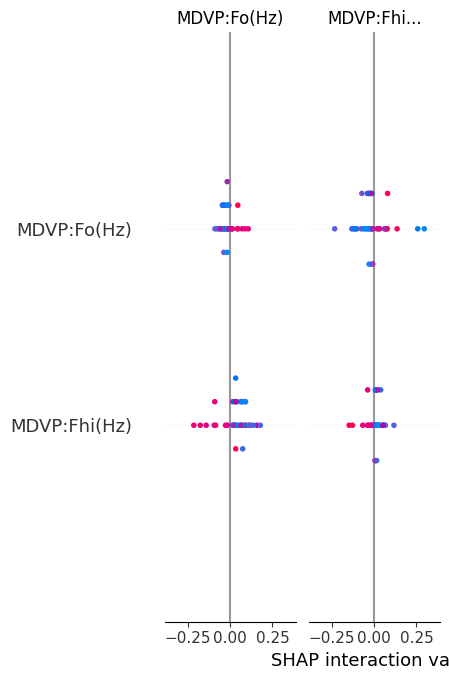

In [ ]:
# Create a DeepExplainer object
explainer_2d = shap.DeepExplainer(model_2d, X_train_smote_2d)

# Calculate SHAP values
shap_values_2d = explainer_2d.shap_values(X_test_2d)

# Reshaping shap_values for visualization
shap_values_2d = np.squeeze(shap_values_2d)

# Plotting SHAP summary plot for 2D CNN
shap.summary_plot(shap_values_2d, X_test, plot_type='bar', feature_names=X.columns)